In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame({
    'x':list(range(-100,100,4))})




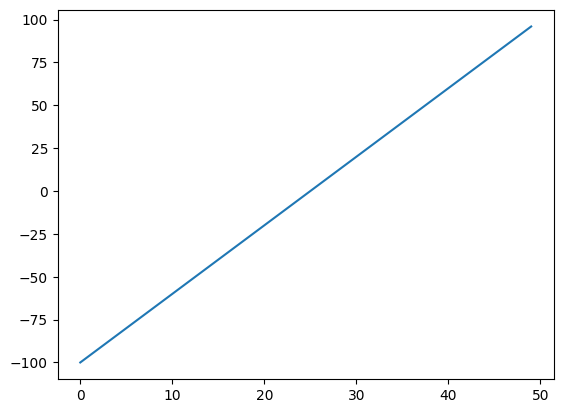

In [4]:
plt.plot(df['x'])

In [5]:
df['x2']=df['x']**2
df['x3']=df['x']**3
df['x4']=df['x']**4

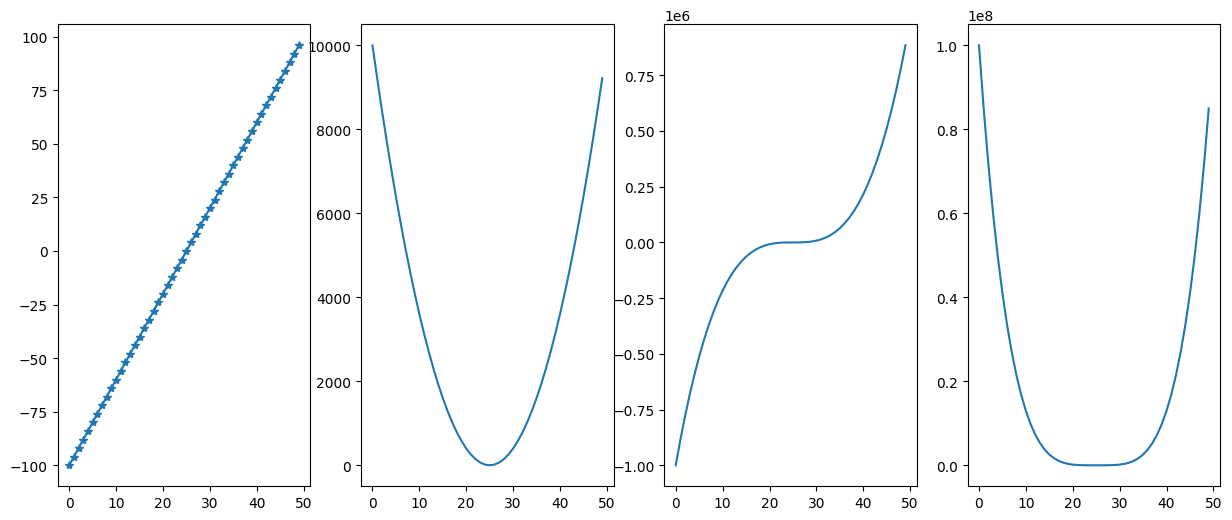

In [6]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(15,6))
ax1.plot(df['x'],label='degre1 ',marker='*')
ax2.plot(df['x2'],label='2')
ax3.plot(df['x3'],label='2')
ax4.plot(df['x4'],label='2')

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<Axes: xlabel='Level', ylabel='Salary'>

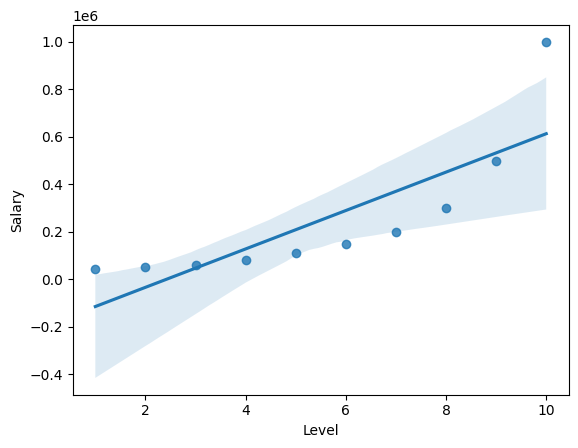

In [8]:
sns.regplot(x='Level',y='Salary',data=df)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score ,mean_squared_error ,mean_absolute_error
from sklearn.model_selection import cross_validate

In [10]:
x=df[['Level']]
y=df['Salary']

In [11]:
np.set_printoptions(suppress=True)

In [12]:

pf=PolynomialFeatures(degree=4)
xp=pf.fit_transform(x)

In [13]:
xp

array([[    1.,     1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.,    16.],
       [    1.,     3.,     9.,    27.,    81.],
       [    1.,     4.,    16.,    64.,   256.],
       [    1.,     5.,    25.,   125.,   625.],
       [    1.,     6.,    36.,   216.,  1296.],
       [    1.,     7.,    49.,   343.,  2401.],
       [    1.,     8.,    64.,   512.,  4096.],
       [    1.,     9.,    81.,   729.,  6561.],
       [    1.,    10.,   100.,  1000., 10000.]])

In [14]:
reg=LinearRegression()
reg.fit(xp,y)

LinearRegression()

In [15]:
ypred = reg.predict(xp)
r2_score(y, ypred)

0.9973922891706614

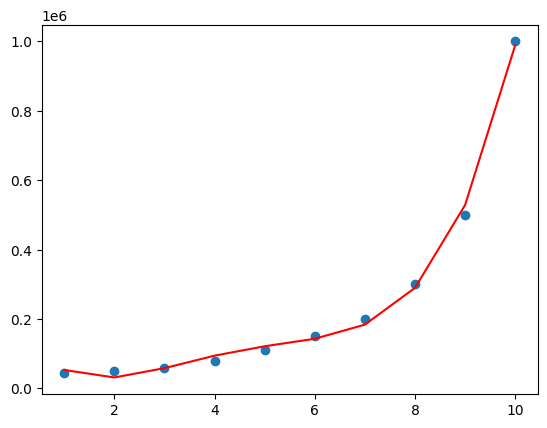

In [16]:
plt.scatter(x, y)
plt.plot(x, ypred, color='red')
plt.show()

In [17]:
reg.predict(pf.transform([[11],[12],[13]])).astype(int)

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1780833, 3035984, 4907272])

-- Creating perfect example

In [18]:
df2 = pd.read_csv('../Datasets/data.csv')
df2

,x,y,z
0,40.770777,55.084383,a
1,50.816358,55.502052,a
2,7.890475,56.843867,a
3,30.277150,60.169798,a
4,2.542331,90.761032,a
...,...,...,...
479,609.602832,421.727144,a
480,677.169681,373.198792,a
481,672.596864,387.440247,a
482,648.139905,376.546930,a


<Axes: xlabel='x', ylabel='y'>

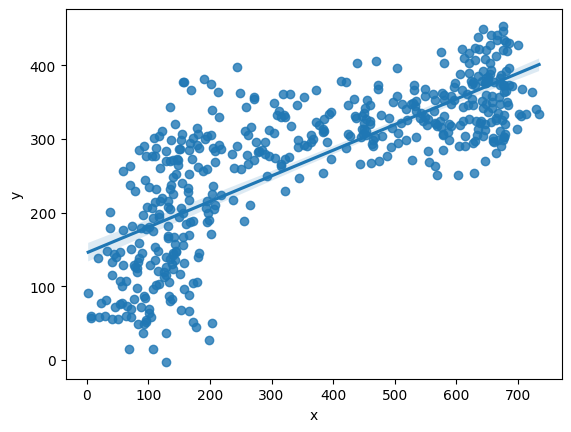

In [19]:
sns.regplot(x='x', y='y', data=df2)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df2[['x']]
Y=df2['y']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [22]:

model=Pipeline(steps=[
    ('POly',PolynomialFeatures(degree=6)),
    ('LinearRegression',LinearRegression()),
])

model.fit(Xtrain,Ytrain)


Pipeline(steps=[('POly', PolynomialFeatures(degree=6)),
                ('LinearRegression', LinearRegression())])

In [23]:
ypred=model.predict(Xtest)

In [25]:
print(f'mean_ab_error',mean_absolute_error(Ytest,ypred))
print(f'mean_squared_error',mean_squared_error(Ytest,ypred))
print(f'r2',r2_score(Ytest,ypred) *100) 

mean_ab_error 44.164169114800345
mean_squared_error 3011.032532436606
r2 72.9645635594607


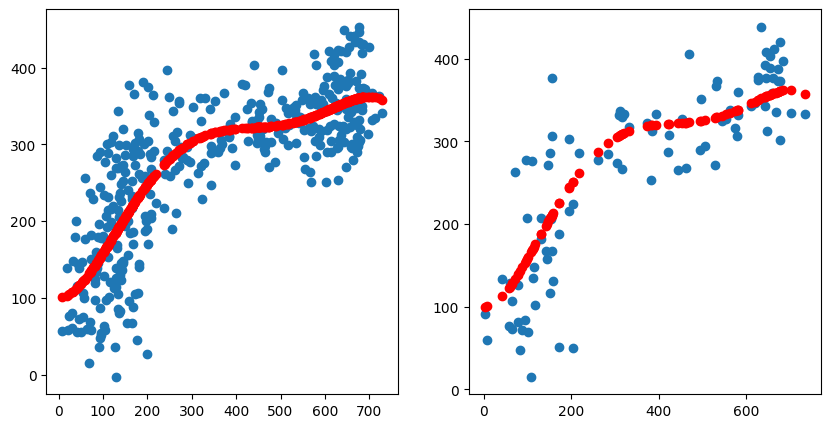

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(Xtrain,Ytrain)
ax1.scatter(Xtrain,model.predict(Xtrain),color='red')
ax2.scatter(Xtest, Ytest)
ax2.scatter(Xtest, ypred, c='red')
plt.show()